In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt   
import seaborn as sns
from dotenv import load_dotenv
import os
import numpy as np
load_dotenv()
db_url = os.getenv("DB_URL")

engine = create_engine(db_url)



In [3]:
import numpy as np 
query="""show tables 
"""
df=pd.read_sql(query,engine)

df.head(20)



,Tables_in_olist_dw
0,dim_customers
1,dim_orders
2,dim_products
3,dim_sellers
4,fact_order_items
5,fact_order_payments
6,fact_order_reviews
7,staging_customers
8,staging_geolocation
9,staging_order_items


In [4]:
df_orders = pd.read_sql(
    "SELECT * FROM dim_orders",
    engine
) 
df_order_items = pd.read_sql(
    "SELECT * FROM fact_order_items",
    engine
) 
df_order_payments = pd.read_sql(
    "SELECT * FROM fact_order_payments",
    engine
) 
df_order_reviews = pd.read_sql(
    "SELECT * FROM fact_order_reviews",
    engine
) 
df_products=pd.read_sql(
    "SELECT * FROM dim_products",
    engine
)
df_customers=pd.read_sql(
    "select * from dim_customers",
    engine)
	
df_sellers=pd.read_sql(
    "select * from dim_sellers",
    engine)


In [35]:
dim_products=pd.read_sql(
    "select * from dim_products",
    engine
)

In [40]:
dim_products

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumery\r,6,300,20,16,16
1,00088930e925c41fd95ebfe695fd2655,auto\r,4,1225,55,10,26
2,0009406fd7479715e4bef61dd91f2462,bed_bath_table\r,2,300,45,15,35
3,000b8f95fcb9e0096488278317764d19,housewares\r,3,550,19,24,12
4,000d9be29b5207b54e86aa1b1ac54872,watches_gifts\r,4,250,22,11,15
...,...,...,...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,cool_stuff\r,1,1400,42,25,15
32947,fff81cc3158d2725c0655ab9ba0f712c,health_beauty\r,1,58,16,16,11
32948,fff9553ac224cec9d15d49f5a263411f,fashion_bags_accessories\r,3,150,16,13,11
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,computers_accessories\r,5,150,16,4,13


In [17]:
print(dim_products['product_category_name'].isna().sum())

0


In [38]:
dim_products=dim_products[dim_products['product_category_name']!= '']
(dim_products['product_category_name']=='').sum()


np.int64(0)

In [52]:
dim_products['product_category_name'] = (
    dim_products['product_category_name']
        .str.replace('\r', '', regex=False)
        .str.replace('_', ' ', regex=False)
)


In [53]:
dim_products.head()

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumery,6,300,20,16,16
1,00088930e925c41fd95ebfe695fd2655,auto,4,1225,55,10,26
2,0009406fd7479715e4bef61dd91f2462,bed bath table,2,300,45,15,35
3,000b8f95fcb9e0096488278317764d19,housewares,3,550,19,24,12
4,000d9be29b5207b54e86aa1b1ac54872,watches gifts,4,250,22,11,15


In [ ]:
dim_products.to_csv("dim_products",index=False)



merge

In [5]:
#df_orders.iloc[:,[1,2]]
df_orders=df_orders[['order_id','customer_id','order_status','order_purchase_timestamp','order_delivered_customer_date']]
df_order_items.rename(columns={'freight_value':'delivery_cost'},inplace=True)


#review table 
df_order_reviews=df_order_reviews[['order_id','review_score','review_creation_date']]

fact=pd.merge(df_orders,df_order_items,on='order_id')


fact.drop('shipping_limit_date',axis=1,inplace=True)
fact.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [6]:
fact=pd.merge(fact,df_order_reviews,on='order_id')
fact.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,5,2017-09-21 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,4,2017-05-13 00:00:00
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5,2018-01-23 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,4,2018-08-15 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5,2017-03-02 00:00:00


In [7]:
fact.describe()
#missing=fact['order_delivered_customer_date'].isna().sum()
#print(missing)
fact[fact['order_delivered_customer_date'].isna()]
fact['delivery_time']=fact['order_delivered_customer_date']-fact['order_purchase_timestamp']
#fact.head()
#(fact['order_delivered_customer_date'] - fact['order_purchase_timestamp']).isna().sum()


fact['delivery_time']=fact['delivery_time'].dt.total_seconds()/(86400)
fact['delivery_time']=(fact['delivery_time'].round(2))
fact.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date,delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,5,2017-09-21 00:00:00,7.61
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,4,2017-05-13 00:00:00,16.22
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5,2018-01-23 00:00:00,7.95
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,4,2018-08-15 00:00:00,6.15
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5,2017-03-02 00:00:00,25.11


TRANSFORM LOAD 

In [8]:
#Grain Check 
fact.groupby("order_id")["order_item_id"].nunique().describe()
fact.groupby("order_id")["review_score"].nunique().describe()
fact['seller_id'].nunique()

3088

In [9]:
#(fact['delivery time']>150).sum()
print(fact['delivery_time']>150)
#fact['delivery time'].describe()
fact['delivery_time']>150
fact_super_late = fact[fact['delivery_time'] > 150]
fact_super_late.head()

fact['seller_id'].nunique()

0         False
1         False
2         False
3         False
4         False
          ...  
111455    False
111456    False
111457    False
111458    False
111459    False
Name: delivery_time, Length: 111460, dtype: bool


3088

In [10]:
#considering only delivered orders
fact=fact[fact['order_status']=='delivered']


In [11]:
fact['has_review'] = fact['review_score'].notna()


In [12]:
fact['super_late'] = fact['delivery_time'] > 120




fact.head()
#fact['seller_id'].nunique()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date,delivery_time,has_review,super_late
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,5,2017-09-21 00:00:00,7.61,True,False
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,4,2017-05-13 00:00:00,16.22,True,False
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5,2018-01-23 00:00:00,7.95,True,False
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,4,2018-08-15 00:00:00,6.15,True,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5,2017-03-02 00:00:00,25.11,True,False


In [13]:
#late_fact=fact[fact['super_late']] 
#late_fact.head()
#fact.groupby('super_late')['review_score'].mean()
late_review_avg = (
    fact.groupby('super_late')['review_score']
        .mean()
        .reset_index(name='avg_review_score')
)

late_review_avg['super_late']=late_review_avg['super_late'].map({True:'more than 150',False:'less than 150' })
late_review_avg

fact['seller_id'].nunique()

2962

In [14]:
fact['high_price']=fact['price']>fact['price'].mean()
fact[fact['high_price']==False]
fact['high_delivery_cost']=fact['delivery_cost']>fact['delivery_cost'].mean()
fact.groupby('high_price')['review_score'].mean()
fact
fact['seller_id'].nunique()

2962

ORDER LEVEL

In [15]:
fact.groupby("order_id")["delivery_cost"].nunique().describe()
fact['seller_id'].nunique()

2962

In [16]:
order_level = (
    fact.groupby("order_id")
    .agg({
        "customer_id": "first",
        "price": "sum",                 
        "delivery_cost": "max",          
        "delivery_time": "first",
        "review_score": "first"
    })
    .reset_index()
)
order_level.head()
fact['seller_id'].nunique()


2962

In [17]:
fact.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date,delivery_time,has_review,super_late,high_price,high_delivery_cost
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,5,2017-09-21 00:00:00,7.61,True,False,False,False
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,4,2017-05-13 00:00:00,16.22,True,False,True,False
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,5,2018-01-23 00:00:00,7.95,True,False,True,False
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,4,2018-08-15 00:00:00,6.15,True,False,False,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,5,2017-03-02 00:00:00,25.11,True,False,True,False


In [18]:
order_seller_level=(
    fact.groupby(["seller_id","order_id"])
    .agg({
        "price":"sum",
        "delivery_time":"first",
        "review_score":"first"
    })
    .reset_index()
    )
order_seller_level.head()
fact['seller_id'].nunique()


2962

In [19]:
seller_level=order_seller_level.groupby("seller_id").agg(
    num_of_orders=("order_id","count"),
    total_revenue=("price","sum"),
    avg_delivery_time=("delivery_time","mean"),
    avg_review=("review_score","mean")
).reset_index()
seller_level['num_of_orders'].max()
seller_level['seller_id'].nunique()

2962

sanity checks

In [20]:
seller_level[seller_level['num_of_orders'] == seller_level['num_of_orders'].max()]


,seller_id,num_of_orders,total_revenue,avg_delivery_time,avg_review
1187,6560211a19b47992c3666cc44a7e94c0,1801,119666.83,9.614758,3.980011


In [21]:
temp=seller_level[seller_level['avg_review']>4.5]

temp.sort_values('num_of_orders',ascending=False)
(temp['num_of_orders']<50).value_counts()

seller_level.sort_values('num_of_orders',ascending=True).head()
#seller_level['avg_review'].describe()
seller_level[seller_level['num_of_orders']<=59990].count()
seller_level['num_of_orders'].describe()

count    2962.000000
mean       32.642134
std       104.263177
min         1.000000
25%         2.000000
50%         7.000000
75%        22.000000
max      1801.000000
Name: num_of_orders, dtype: float64

Sellers with fewer than 20 orders were excluded to reduce noise from low-volume sellers while retaining sufficient coverage of the marketplace

In [22]:
seller_level=seller_level[seller_level['num_of_orders']>=20]
seller_level=seller_level.sort_values('avg_review',ascending=False)
#print(seller_level.sort_values('total_revenue', ascending=False)['total_revenue'].head(20).to_string(index=False))
seller_level['avg_delivery_time'].describe()
seller_level.sort_values('avg_delivery_time',ascending=False)
seller_level['seller_id'].nunique()


799

In [23]:
#checking delivery time based on top 30 revenue  
tempx=seller_level.sort_values('total_revenue',ascending=False).head(30)
tempx['avg_delivery_time'].mean()

np.float64(13.45945388638806)

In [24]:
temp=seller_level.sort_values('total_revenue',ascending=True).head(30)
temp['avg_delivery_time'].mean()


np.float64(9.776928743543209)

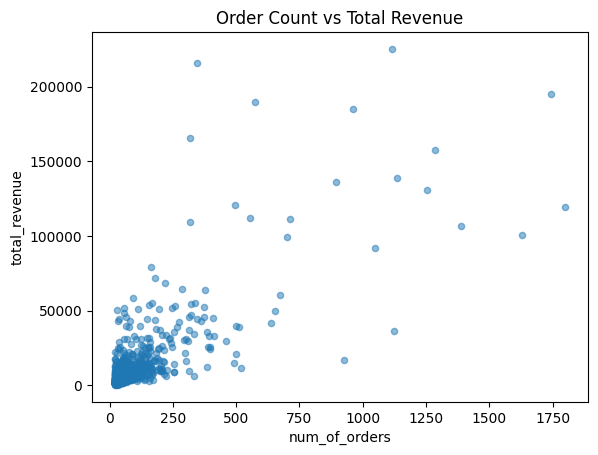

In [25]:

seller_level.plot.scatter(x='num_of_orders', y='total_revenue', alpha=0.5)
plt.title('Order Count vs Total Revenue')
plt.show()

seperating sellers into different quartiles based on revenue  

In [26]:
labels=['low','medium','high']
seller_level['revenue_group']=pd.qcut(seller_level['total_revenue'],q=3,labels=labels)
#check which revenue group has good delivery time
delivery_median=seller_level.groupby('revenue_group')['avg_delivery_time'].median()
#even if high revenue is slower check their review
review_median=seller_level.groupby('revenue_group')['avg_review'].median()
#review score drops as delivery time increases 
print(delivery_median,review_median)


revenue_group
low       11.275000
medium    11.861500
high      12.659703
Name: avg_delivery_time, dtype: float64 revenue_group
low       4.217787
medium    4.185185
high      4.181405
Name: avg_review, dtype: float64


C:\Users\nihal\AppData\Local\Temp\ipykernel_30128\798389197.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_median=seller_level.groupby('revenue_group')['avg_delivery_time'].median()
C:\Users\nihal\AppData\Local\Temp\ipykernel_30128\798389197.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_median=seller_level.groupby('revenue_group')['avg_review'].median()


In [27]:
review_diff=review_median['high']-review_median['low']

delivery_diff=delivery_median['high']-delivery_median['low']


print(f"difference between high and low \ndelivery : {delivery_diff:.2f}\nreview : {review_diff:.2f}")
print(f"\ni.e as the delivery time increase by : {delivery_diff:.2f}\nThe average_review score decrease by {review_diff:.2f}")

difference between high and low 
delivery : 1.38
review : -0.04

i.e as the delivery time increase by : 1.38
The average_review score decrease by -0.04


In [28]:
seller_level['rank_by_delivery']=seller_level.groupby('revenue_group')['avg_delivery_time'].rank(method="dense",ascending=True)
order_level.head()
seller_level.head()

C:\Users\nihal\AppData\Local\Temp\ipykernel_30128\2296912035.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seller_level['rank_by_delivery']=seller_level.groupby('revenue_group')['avg_delivery_time'].rank(method="dense",ascending=True)


,seller_id,num_of_orders,total_revenue,avg_delivery_time,avg_review,revenue_group,rank_by_delivery
838,48efc9d94a9834137efd9ea76b065a38,33,345.60,10.793636,5.000000,low,119.0
761,41c2bad7229b0c25e6becf179ebf63ff,20,782.00,4.693000,4.950000,low,1.0
33,02f5837340d7eb4f653d676c7256523a,30,3883.05,9.659333,4.833333,low,78.0
2427,d13e50eaa47b4cbe9eb81465865d8cfc,66,7073.05,5.039242,4.818182,medium,1.0
774,42fa4ee7240e9b8eb4576358ec142ba7,21,3646.70,6.931905,4.809524,low,14.0


In [29]:
order_level.head()
seller_level.to_csv("seller_level.csv",index=False)
order_level.to_csv("order_level.csv",index=False)


% of orders delivered late


In [30]:
late_pct = fact['super_late'].mean() * 100
on_time_pct = 100 - late_pct
pd.DataFrame({
    'delivery_status': ['Late', 'On-time'],
    'percentage': [late_pct, on_time_pct]
})


,delivery_status,percentage
0,Late,0.042151
1,On-time,99.957849


Average delivery time by seller

In [31]:
#fact['seller_id'].nunique()
#fact['delivery_time'].isna().sum()
#fact[fact['delivery_time'].isna()]
fact.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    8
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
delivery_cost                    0
review_score                     0
review_creation_date             0
delivery_time                    8
has_review                       0
super_late                       0
high_price                       0
high_delivery_cost               0
dtype: int64

In [32]:

avg_seller_delivery= (fact.groupby('seller_id')
                      .filter(lambda x:len(x)>=50)
                      .groupby('seller_id')['delivery_time']
                      .mean())
avg_seller_delivery


seller_id
001cca7ae9ae17fb1caed9dfb1094831    12.854199
002100f778ceb8431b7a1020ff7ab48f    16.192593
004c9cd9d87a3c30c522c48c4fc07416    14.546380
00ee68308b45bc5e2660cd833c3f81cc     9.127412
00fc707aaaad2d31347cf883cd2dfe10    15.891077
                                      ...    
fdb9095204a334cd8872252ffec6f2db     8.871311
fe2032dab1a61af8794248c8196565c9    10.437433
febab0275244b9a49a623f0bd613ca2f     8.175159
ff063b022a9a0aab91bad2c9088760b7     9.394894
fffd5413c0700ac820c7069d66d98c89    13.435263
Name: delivery_time, Length: 455, dtype: float64

In [33]:
fact[fact['order_item_id']>=2]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date,delivery_time,has_review,super_late,high_price,high_delivery_cost
14,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-26 13:55:22,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,49.90,13.37,5,2018-02-27 00:00:00,12.66,True,False,False,False
40,001ab0a7578dd66cd4b0a71f5b6e1e41,8bb3bef4e75a95524235cdc11a7331af,delivered,2017-12-27 00:38:47,2018-01-17 20:43:29,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,17.63,4,2018-01-18 00:00:00,21.84,True,False,False,False
41,001ab0a7578dd66cd4b0a71f5b6e1e41,8bb3bef4e75a95524235cdc11a7331af,delivered,2017-12-27 00:38:47,2018-01-17 20:43:29,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,24.89,17.63,4,2018-01-18 00:00:00,21.84,True,False,False,False
46,001d8f0e34a38c37f7dba2a37d4eba8b,d987da9fb4086ab7c2c0f83963cd6722,delivered,2017-05-14 17:19:44,2017-05-26 13:14:50,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,18.99,7.78,1,2017-05-26 00:00:00,11.83,True,False,False,False
73,002c9def9c9b951b1bec6d50753c9891,06cf02bf583b05fd91bc8eec0f1b4c3f,delivered,2018-05-14 16:57:47,2018-05-18 14:37:38,2,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,78.00,8.90,4,2018-05-19 00:00:00,3.90,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111427,ffecd5a79a0084f6a592288c67e3c298,8afa5a415d65a08e3a68b1d7f9ddd8a5,delivered,2018-02-27 20:00:25,2018-03-29 14:37:05,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,21.90,15.79,2,2018-03-24 00:00:00,29.78,True,False,False,False
111445,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,2018-04-07 10:07:48,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,180.00,48.14,5,2018-04-08 00:00:00,20.91,True,False,True,True
111451,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-11-17 19:41:42,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19,4,2017-11-18 00:00:00,21.12,True,False,False,True
111452,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-11-17 19:41:42,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.00,34.19,4,2017-11-18 00:00:00,21.12,True,False,False,True


In [34]:
fact[fact['order_id']=='fffb9224b6fc7c43ebb0904318b10b5f']

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_item_id,product_id,seller_id,price,delivery_cost,review_score,review_creation_date,delivery_time,has_review,super_late,high_price,high_delivery_cost
111450,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-11-17 19:41:42,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.0,34.19,4,2017-11-18 00:00:00,21.12,True,False,False,True
111451,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-11-17 19:41:42,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.0,34.19,4,2017-11-18 00:00:00,21.12,True,False,False,True
111452,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-11-17 19:41:42,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.0,34.19,4,2017-11-18 00:00:00,21.12,True,False,False,True
111453,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-11-17 19:41:42,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,55.0,34.19,4,2017-11-18 00:00:00,21.12,True,False,False,True


In [35]:

'''
plt.figure(figsize=(7,5))
plt.scatter(fact['delivery_cost'], fact['delivery_time'], alpha=0.3)
\plt.xlabel('Delivery Cost')
plt.ylabel('Delivery Time (days)')
plt.title('Delivery Cost vs Delivery Time')
plt.show()
'''


"\nplt.figure(figsize=(7,5))\nplt.scatter(fact['delivery_cost'], fact['delivery_time'], alpha=0.3)\n\\plt.xlabel('Delivery Cost')\nplt.ylabel('Delivery Time (days)')\nplt.title('Delivery Cost vs Delivery Time')\nplt.show()\n"

In [36]:


#df_order_items.groupby(['seller_id'])['price'].count()
#df_order_items[df_order_items['seller_id'].isin(df_order_items.nlargest(5, 'price')['seller_id'])]
#df_order_items(['price'])
df_order_items[df_order_items['price']<=6000].sort_values(['price'],ascending=False).head(5)
#df_order_items.nlargest(5,'price')


#df_order_items.plot(kind='scatter',x='price',y='seller_id')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,delivery_cost
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
62086,8dbc85d1447242f3b127dda390d56e19,1,259037a6a41845e455183f89c5035f18,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78
29193,426a9742b533fc6fed17d1fd6d143d7e,1,a1beef8f3992dbd4cd8726796aa69c53,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45
45843,68101694e5c5dc7330c91e1bbc36214f,1,6cdf8fc1d741c76586d8b6b15e9eef30,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27
